<a href="https://colab.research.google.com/github/Eashanbala/fruit-knn-classifier/blob/main/ML_Mini_Project(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict what kind of fruit this is based on size & weight!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = {
    'Fruit': ['Apple', 'Banana', 'Orange', 'Banana', 'Apple', 'Orange'],
    'Size': [3, 6, 4, 7, 2, 5],
    'Weight': [150, 120, 130, 110, 160, 140]
}

df = pd.DataFrame(data)
df.columns = df.columns.str.strip()  # ✅ Clean up spaces from column names

print(df.columns)  # ✅ Double check they’re clean


Index(['Fruit', 'Size', 'Weight'], dtype='object')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127822 (\N{RED APPLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127820 (\N{BANANA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127818 (\N{TANGERINE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


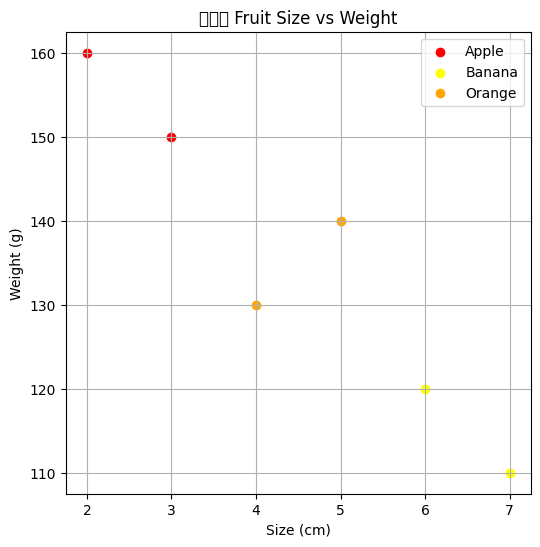

In [ ]:
colors = {'Apple': 'red', 'Banana': 'yellow', 'Orange': 'orange'}  # Pick a color for each fruit

plt.figure(figsize=(6, 6))

for fruit in df['Fruit'].unique():
    sub = df[df['Fruit'] == fruit]
    plt.scatter(sub['Size'], sub['Weight'], label=fruit, color=colors[fruit])  # Plot them

plt.xlabel('Size (cm)')
plt.ylabel('Weight (g)')
plt.title('🍎🍌🍊 Fruit Size vs Weight')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128373 (\N{SLEUTH OR SPY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


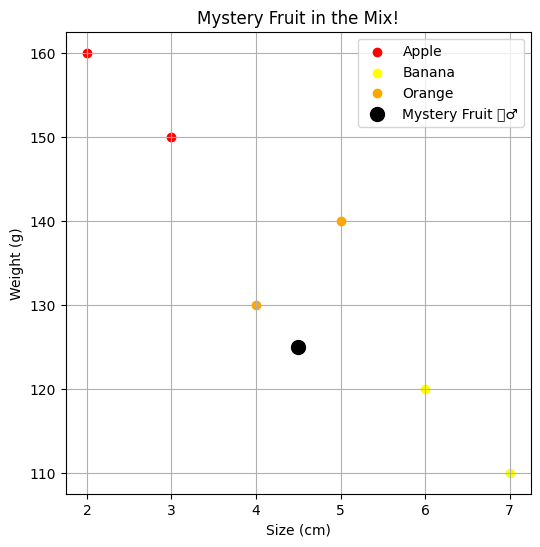

In [ ]:

mystery = {'Size': 4.5, 'Weight': 125}


plt.figure(figsize=(6, 6))

for fruit in df['Fruit'].unique():
    sub = df[df['Fruit'] == fruit]
    plt.scatter(sub['Size'], sub['Weight'], label=fruit, color=colors[fruit])


plt.scatter(mystery['Size'], mystery['Weight'], color='black', label='Mystery Fruit 🕵️‍♂️', s=100)

plt.xlabel('Size (cm)')
plt.ylabel('Weight (g)')
plt.title('Mystery Fruit in the Mix!')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

def distance(row):
    return np.sqrt((row['Size'] - mystery['Size'])**2 + (row['Weight'] - mystery['Weight'])**2)

df['Distance'] = df.apply(distance, axis=1)
df_sorted = df.sort_values('Distance')
df_sorted

,Fruit,Size,Weight,Distance
2,Orange,4,130,5.024938
1,Banana,6,120,5.220153
5,Orange,5,140,15.008331
3,Banana,7,110,15.206906
0,Apple,3,150,25.044960
4,Apple,2,160,35.089172


In [ ]:
k = 3
neighbors = df_sorted.head(k)
prediction = neighbors['Fruit'].value_counts().idxmax()
print("The mystery fruit is probably a:", prediction)


🔍 The mystery fruit is probably a: Orange
